In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## 1.准备数据

In [8]:
def file2matrix(filename):
    """
    该函数，主要是讲读取的文件转为为数组，生成标签列表
    """
    # 读取文件
    fr = open(filename)
    array0Lines =fr.readlines()
    # 读取到的行数
    number0Lines = len(array0Lines)
    # 构造一个shape(1000,3)全为0的矩阵
    returnMat = np.zeros((number0Lines,3))
    # 定义一个空列表，用于储存类标签
    classLabelVector = []
    index= 0
    # 遍历文件内容的每一行，构造矩阵，生成类标签的列表
    for line in array0Lines:
        # 去除每一行的空格
        line = line.strip()
        # 将每一行的内容以'\t'分割
        listFromLine = line.split('\t')
        # 将每一行分割后的列表取前3个元素，作为矩阵的每一行内容
        returnMat[index,:] = listFromLine[0:3]
        # 取出每一行分割后的最后一个元素，添加到标签列表
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 将生成的矩阵和标签列表返回
    return returnMat,classLabelVector

In [20]:
X,y = file2matrix('datingTestSet2.txt')

In [12]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [34]:
# 数据归一化处理
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()  
X = scaler.fit_transform(X)  

In [41]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("kNN with weight",KNeighborsClassifier(n_neighbors=5,weights='distance')))
# models.append(('Radius Neighbour',RadiusNeighborsClassifier(n_neighbors=2,radius=800.0)))
# 分别训练3个模型，并计算得分
results = []
for name,model in models:
    model.fit(X_train,y_train)
    results.append((name,model.score(X_test,y_test)))
for i in range(len(results)):
    print("name:{};score:{}".format(results[i][0],results[i][1]))

name:KNN;score:0.8
name:kNN with weight;score:0.79


In [42]:
# 使用交叉验证对比算法的准确性
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


results = []

for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X,y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print("name:{};cross val score:{}".format(results[i][0],results[i][1].mean()))

name:KNN;cross val score:0.951
name:kNN with weight;cross val score:0.95


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)
print("train score:{};\ntest score:{}".format(train_score,test_score))

train score:0.85875;
test score:0.8


In [44]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

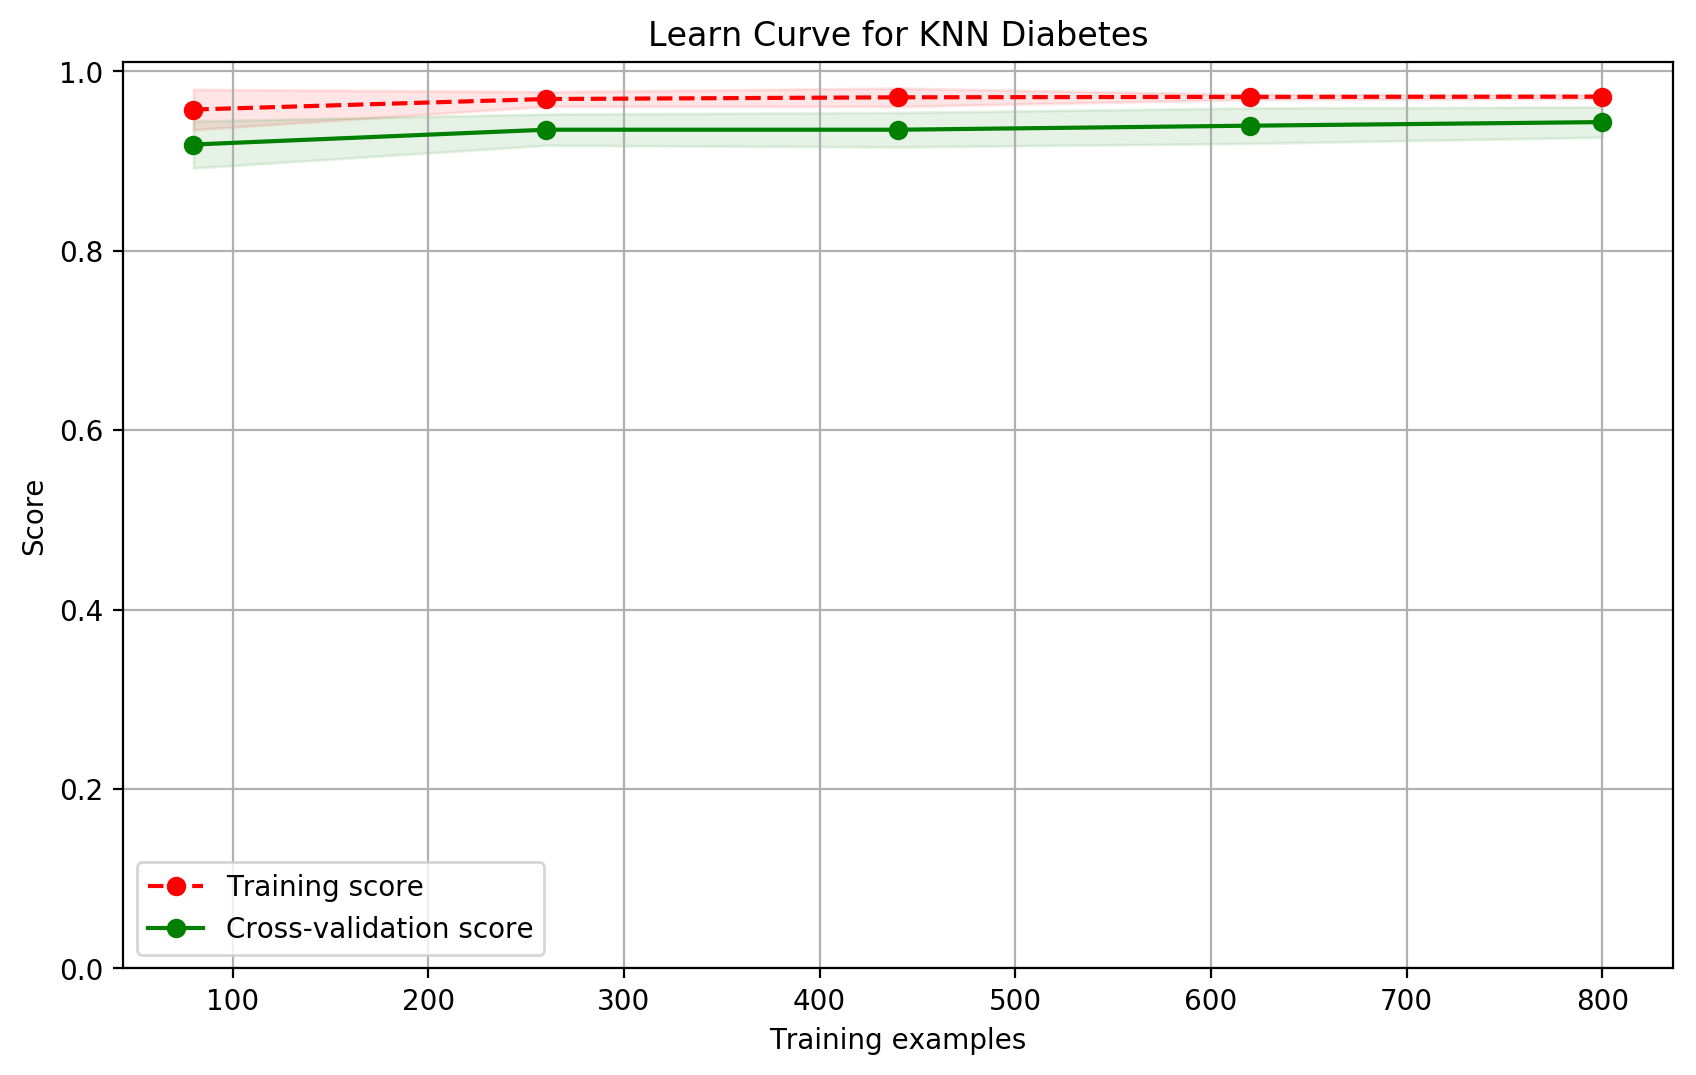

In [47]:
from sklearn.model_selection import ShuffleSplit

knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6), dpi=200)
plot_learning_curve(plt, knn, "Learn Curve for KNN Diabetes", 
                    X, y, ylim=(0.0, 1.01), cv=cv);